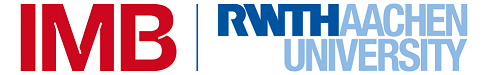

[Previous notebook: 4_3_Bond_behavior_governed_by_plasticity](./4_3_Bond_behavior_governed_by_plasticity.ipynb)

[Next notebook: 6_1_Energy_released_in_pullout_constant_bond_and_rigid_matrix](./6_1_Energy_released_in_pullout_constant_bond_and_rigid_matrix.ipynb)

# Example 5.2: Pull-out of FRP-concrete bond
This example reproduces the experimental and numerical study presented in 

Dai, J., Ueda, T. & Sato, Y. Development of the Nonlinear Bond Stress–Slip Model of Fiber Reinforced Plastics Sheet–Concrete Interfaces with a Simple Method. en. Journal of Composites for Construction, 9, pages 52–62. issn: 1090-0268, 1943-5614 (Feb. 2005)

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from bmcs.api import PullOutModel


## Model parameters
Let us consider the case of the CFRP sheet debonding from concrete

In [2]:
A_f = 11.0 # [mm^2]
A_m = 80000.0 # [mm^2]
p = 100.0 #
E_f = 230000.0 # [MPa]
E_m = 28000.0 # [MPa]

## Construct the finite element pullout model
The model uses a multilinear bond-slip law specified by the attributes 
s_arr and tau_arr specifying the pairs of slip and bond stress values.

In [3]:
pm = PullOutModel(mats_eval_type='damage',
                  n_e_x=200, w_max=1.0)
pm.tline.step = 0.006
pm.tloop.k_max=500 

In [4]:
pm

 ## Damage function parameters

In [5]:
pm.mats_eval.omega_fn_type = 'FRP'
pm.mats_eval.omega_fn.trait_set( 
    B=10.4,
    Gf=1.19
)
pm.mats_eval.omega_fn

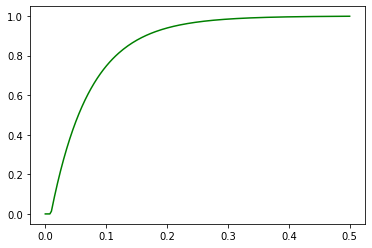

In [6]:
pm.mats_eval.omega_fn.plot(plt.axes())

In [7]:
#pm.mats_eval.plot(plt.axes())

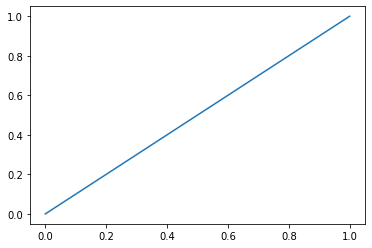

In [8]:
pm.loading_scenario.plot(plt.axes())
pm.loading_scenario.trait_set(loading_type='cyclic')
pm.loading_scenario.trait_set(number_of_cycles=1)

In [9]:
pm.mats_eval# configuration of the material model

In [10]:
pm.cross_section.trait_set(A_f=A_f, P_b=p, A_m=A_m)
pm.cross_section # display the cross section parameters

In [ ]:
w = pm.get_window()
w.configure_traits()

# Questions and Tasks

Analyze the data published in the paper that introduce this model
In particular:
1. Calculate the maximum pullout force using other types of fibers and adhesives and compare the results with the experimental results, for example the specimes (GR1L1, CR3L1)
2. Calculate the anchorage length for the following combination:
 - Carbon fiber with the adhesive (CN-100)
 - Glass fiber with the adhesive (FR-E3P)

## How would the pullout test unload?